<center><img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" /></center>

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 Aprendizaje Automático </h1>

<H3 align='center'> Tarea/Taller 1 </H3>
<hr style="height:2px;border:none"/>


# Temas

* Clasificadores Discriminativos Clásicos
* Clasificadores Generativos Clásicos
* Evaluación de Clasificadores


# Reglas & Formalidades

* Pueden trabajar en equipos de 2 a 3 personas. 
* Los equipos deben ser inscritos antes del 24 Septiembre.
* Pueden reusar código visto en clases y/o recolectar código/ideas de otros sitios, mencionando al autor y entregando un link a la fuente. 
* Si resulta necesaria, la intervención de personas ajenas al grupo (e.g. experto) debe ser declarada y justificada.
* Tener roles dentro del equipo está bien, pero al final del proceso, cada miembro debe entender y estar en condiciones de exponer todo el trabajo realizado. 


# Integrantes

1. Fernanda Avendaño
2. Diego Quezada
3. Kevin Reyes

## Entregables 


> * **Video:** Se debe preparar un video explicativo de **15 a 20 minutos** donde se describe la metodología utilizada, los resultados obtenidos y las conclusiones de la experiencia. 

> * **Código:** Se debe enviar un jupyter notebook con el código utilizado, de modo que sea posible **reproducir los resultados** presentados. Como alternativa, se puede entregar un link Github con el código fuente, incluyendo instrucciones precisas para ejecutar los experimentos. En cualquier caso (notebook o repo) el código debe estar ordenado y seccionado apropiadamente.

> * **Conformidad Ética:** Se debe incluir una breve declaración ética en que se indique que el trabajo que se está enviando es un trabajo original, desarollado por los autores en conformidad con todas reglas antes mencionadas. Se debe también mencionar brevemente cuál fue la contribución de cada miembro del equipo. La declaración puede ser parte del notebook o estar en un archivo dentro del repo.

> * **Defensa en vivo (video-conferencia):** El día de clases agendado para la discusión del taller, se seleccionarán aleatoriamente algunos equipos que presentarán oralmente su trabajo ante el curso. Los autores serán evaluados considerando la discusión y debate que generen entre sus pares. Los puntos obtenidos (positivos o negativos) se sumarán a la nota final de taller.

## Fechas

> * Defensas: 15 de Octubre, horario de clases.
> * Fecha de entrega de vídeo: 16 de Octubre 23:59 Hrs. (1 días después de encuentro).
> * Fecha de entrega de Jupyter (notebook): 15 de Octubre 08:00 (se pueden hacer actualizaciones hasta el 16 de Octubre 23:59 Hrs.). 



# Instrucciones

La tarea se divide en dos secciones:



> **1. Pregunta de Investigación**. Para esta parte, los autores deben elegir una hipótesis de investigación y diseñar un procedimiento experimental que permita reunir evidencia en contra o a favor de la misma. Es legítimo tomar una posición *a-priori* en base a lo que han aprendido en el curso, pero es importante analizar críticamente los resultados sin descartar hipótesis alternativas. 

> La metodología debe incluir al menos 3 datasets, de los cuales al menos 2 deben ser reales. Es deseable también que incluyan experimentos controlados sobre dataset sintéticos o semi-sintéticos no triviales diseñados por ustedes. Por ejemplo, para demostrar que un método logra ignorar variables irrelevantes se podrían crear variables "fake" manualmente. Experimentos de este último tipo que se basen en un dataset real contarán como realizados sobre "dataset reales".

> Si no es relevante para la pregunta de investigación y en honor al tiempo, no es necesario llevar a cabo un análisis exploratorio detallado sobre cada dataset utilizado.

>  **2. Desafío Kaggle**. Para esta parte, los autores enfrentarán un desafío en la plataforma Kaggle y serán calificados en base a su posición en el tablero de resultados y el puntaje obtenido.





<hr style="height:2px;border:none"/>


# Parte 1. Pregunta de Investigación

## Introducción

### Label noise

El label noise es el problema asociado a etiquetar incorrectamente datos. Este problema es de especial interés en Machine Learning debido a que los modelos supervisados aprenden de los datos de entrenamiento, por lo que, si los datos son demasiado ruidosos el aprendizaje resultará en un modelo impreciso. Label noise tiene una gran importancia práctica debido a que es de esperarse que los datasets contengan todo tipo de ruido, entre ellos, los asociados a etiquetas incorrectas.

### Hipótesis

Un clasificador de tipo generativo es extremadamente sensible a errores de etiquetación, es decir aún si un porcentaje pequeño (< 10%) de las etiquetas de entrenamiento está corrupta, su desempeño se deteriora significativamente (> 10% de acccuracy).

## Metodología

El procedimiento experimental que nos permitirá reunir evidencia para poner a prueba la hipótesis descrita anteriormente queda expresado en el siguiente **diagrama de flujo**

<p align="center">
  <img src="./images/diagrama.png" />
</p>

En cada iteración se guarda en un arreglo el valor $d_{ij} = e_{ij}^{c} - e_{ij} = a_{ij} - a^c_{ij}$ (denotando por $a$ al accuracy) para conformar una **muestra** de las diferencias de error de los clasificadores generativos aplicados a un dataset correcto y uno corrupto. 

### Test de hipótesis

Las **hipótesis** a considerar serán las siguientes:
  
$$
H_0: \mu_{d} = 10
$$
$$
H_1: \mu_{d} < 10
$$


Se realizará el número suficiente de experimentos para aplicar el **teorema central del límite** y reemplazar la varianza poblacional por la varianza muestral.

Se plantea el siguiente **estadístico de prueba** asumiendo que $\overline{X_{d}}$ sigue una distribución normal:

$$
Z = \frac{\overline{X_{d}}-10}{s_{d}/\sqrt{m}} \approx N(0,1) \text{  Si } H_0 \text{ es verdadera }
$$
donde m es el número total de experimentos. 
 
Para aceptar o rechazar la hipótesis se usará un **nivel de significancia** $\alpha = 0.05$. A continuación el esquema de decisión:  

$$
\text{Regla de decisión}=
\begin{cases}
\text{Rechazar } H_0 \text{ si} & P(Z \leq \frac{\overline{X_d}-10}{s/\sqrt{m}}) < 0.05 \\ 
\text{Aceptar } H_0 \text{ si} & P(Z \leq \frac{\overline{X_d}-10}{s/\sqrt{m}}) \geq 0.05
\end{cases}
$$


Notar que $P(Z \leq \frac{\overline{X_d}-10}{s/\sqrt{m}})$ indica la probabilidad de que el estadístico de prueba sea al menos tan contradictorio a $H_0$ como el valor calculado desde la muestra. Es por esto, que cuando esta probabilidad es menor a 0.05 estamos en presencia de una muestra muy rara asumiendo $H_0$ como verdadero, por lo que la presencia de la muestra solo se puede explicar si $H_0$ es falsa.

## Simulación computacional

### Importación librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm

### Datasets

Trabajaremos con los siguientes cuatros datasets:

1. [Fetal Health](https://archive.ics.uci.edu/ml/datasets/cardiotocography): Este conjunto de datos contiene 2126 registros de 23 características extraídas de exámenes de cardiotocograma. Se busca predecir la salud de los fetos como normal, sospechosa o patológica.
2. [Wheat Seeds](https://archive.ics.uci.edu/ml/datasets/seeds): Este conjunto de datos contiene 210 mediciones de 7 propiedades geométricas de granos pertenecientes a tres variedades diferentes de trigo. Se busca predecir el tipo de trigo.
3. [Heart Failure](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records): Este conjunto de datos contiene los registros médicos de 299 pacientes que tuvieron insuficiencia cardíaca, recopilados durante su período de seguimiento, donde cada perfil de paciente tiene 13 características clínicas. Se busca predecir, en pos de prevenir, el fallecimiento de pacientes.
4. [MNIST](https://www.kaggle.com/c/digit-recognizer/data): Este conjunto de datos contiene 1797 registros que mediante 64 caracteristicas (pixeles) describen imágenes de dígitos escritos a mano en blanco y negro. Se busca predecir el dígito escrito a mano.

In [2]:
fetal_health = pd.read_csv('./datasets/fetal_health.csv')
wheat_seeds = pd.read_csv('./datasets/wheat-seeds.csv')
heart_failure = pd.read_csv('./datasets/heart_failure_clinical_records_dataset.csv')
digits = load_digits()

### Modelo

Utilizaremos el modelo [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) estándar de Sckit Learn para nuestra investigación.

### Generación de muestra

In [3]:
def corrupt_labels(y, categories, corrupt_percentage):
    
    n = len(y)
    
    # Define the number of labels to corrupt
    number_labels_to_corrupt = np.floor(n * corrupt_percentage)

    # Define the list that keeps track of indexes that have already been corrupted
    corrupted_labels_index = list()

    # Define the variable that keeps track of corrupted labels
    number_corrupted_labels = 0

    # Corrupt number_labels_to_corrupt labels
    while(number_corrupted_labels < number_labels_to_corrupt):
        
        index_to_corrupt = np.random.randint(0,n)

        # If label with index index_to_corrupt has not been corrupted, corrupt it
        if(index_to_corrupt not in corrupted_labels_index):

            # Define the possible labels to corrupt the current one
            possibles_labels = np.array(categories, copy=True) #categories.copy()
            possibles_labels = possibles_labels[possibles_labels != y[index_to_corrupt]]

            # Take a random label from possibles labels
            new_label_index = np.random.randint(0, len(possibles_labels))

            # Corrupt
            y[index_to_corrupt] = possibles_labels[new_label_index]

            # Update state variables
            corrupted_labels_index.append(index_to_corrupt)
            number_corrupted_labels = number_corrupted_labels + 1

    # Return the corrupted y
    return y

def accuracy_variation(X, y, categories, test_size, corrupt_percentage):
    
    # Create train and test sets with a fixed seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    
    # Train the model with the original labels and calculate the accuracy
    model_original = GaussianNB()
    model_original.fit(X_train, y_train)
    accuracy_original = model_original.score(X_test, y_test) 
    
    # Corrupt 10% of the labels
    y_train_corrupted = corrupt_labels(y_train, categories, corrupt_percentage)
    
    # Train the model with the corrupted labels and calculate the accuracy
    model_corrupted = GaussianNB()
    model_corrupted.fit(X_train, y_train_corrupted)
    accuracy_corrupted = model_corrupted.score(X_test, y_test) 
    
    # Return the accuracy decrease (or the error increase)
    return accuracy_original - accuracy_corrupted

def create_sample_data(n, corrupt_percentage):
    
    # Import datasets
    fetal_health = pd.read_csv('./datasets/fetal_health.csv')
    wheat_seeds = pd.read_csv('./datasets/wheat-seeds.csv')
    heart_failure = pd.read_csv('./datasets/heart_failure_clinical_records_dataset.csv')
    digits = load_digits()
    
    # Define X and y for every dataset
    data = {
            'fetal_health': (fetal_health[fetal_health.columns[:-1]].copy(), np.array(fetal_health[fetal_health.columns[-1]].copy())),
            'wheat_seeds': (wheat_seeds[wheat_seeds.columns[:-1]].copy(), np.array(wheat_seeds[wheat_seeds.columns[-1]].copy())),
            'heart_failure': (heart_failure[heart_failure.columns[:-1]], np.array(heart_failure[heart_failure.columns[-1]].copy())),
            'digits': (digits['data'], digits['target'])
           }
    
    # Create sample data for every dataset
    sample = {'fetal_health': [], 'wheat_seeds': [], 'heart_failure': [], 'digits': []}
    
    for dataset, values in data.items():
        X,y = values
        categories = np.unique(y)
        
        for i in range(n):
            
            # Calculate accuracy variation
            sample[dataset].append(accuracy_variation(X, y, categories, 0.2, corrupt_percentage))

    return sample

### Validación hipotesis

In [4]:
def test_hypothesis(n, alpha, corrupt_percentage=0.1):
    
    validations = []
    
    # Generate a sample of n accuracy variations (accuracy_original - accuracy_corrupted) for each dataset
    sample = create_sample_data(n, corrupt_percentage)
    
    # For each data set, test the hypothesis
    for dataset, values in sample.items():
        
        # Calculate mean and std sample estimators
        x,s = np.mean(values), np.std(values, ddof=1)
        
        # Calculate test statistic
        Z = (x - 0.1) / (s / np.sqrt(n)) #  Z = (x - 0.1) / (s / np.sqrt(len(values)))
        
        # Calculate P value
        P = norm.cdf(Z)
        
        # Append validations results
        validations.append( [dataset, P >= alpha, P, x] )
    
    return pd.DataFrame(validations, columns = ["Dataset", "Test result", "P value", "Sample mean accuracy variation"])

In [5]:
print(test_hypothesis(100, 0.05, 0.1)) # 10% of corruption

         Dataset  Test result        P value  Sample mean accuracy variation
0   fetal_health        False   0.000000e+00                        0.028310
1    wheat_seeds        False  8.130538e-170                        0.038571
2  heart_failure        False   3.286733e-95                        0.039333
3         digits         True   1.000000e+00                        0.172472


In [6]:
print(test_hypothesis(100, 0.05, 0.6)) # 60% of corruption

         Dataset  Test result  P value  Sample mean accuracy variation
0   fetal_health         True      1.0                        0.198991
1    wheat_seeds         True      1.0                        0.275238
2  heart_failure         True      1.0                        0.618667
3         digits         True      1.0                        0.541194


Notar que si bien los resultados de los test de hipótesis varían debido a la estocasticidad de la muestra generada computacionalmente, generalmente el test resulta exitoso para todos los datasets.

## Verificación supuestos

Para que nuestra metodología sea válida, es necesario verificar el supuesto de normalidad considerado en el test de hipótesis. Recordar que se consideró que las diferencias de error de los clasificadores generativos aplicados a un dataset correcto y uno corrupto se distribuían normalmente.

### Método gráfico

In [7]:
sample = create_sample_data(100, 0.1)

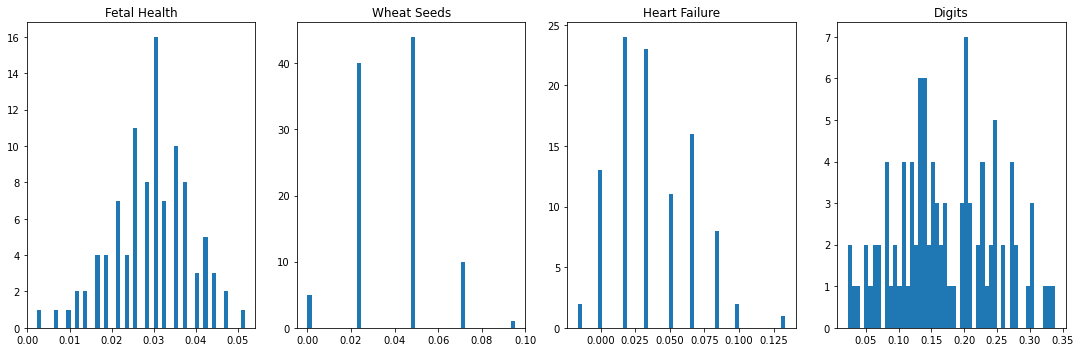

In [8]:
fig, axs = plt.subplots(1, 4, sharey=False, tight_layout=True, figsize=(15,5))
n_bins = 50

axs[0].hist(sample['fetal_health'], bins=n_bins)
axs[0].set_title("Fetal Health")

axs[1].hist(sample['wheat_seeds'], bins=n_bins)
axs[1].set_title("Wheat Seeds")

axs[2].hist(sample['heart_failure'], bins=n_bins)
axs[2].set_title("Heart Failure")

axs[3].hist(sample['digits'], bins=n_bins)
axs[3].set_title("Digits")

plt.show()

### Test de normalidad

El siguiente test de hipótesis plantea como hipótesis nula que la data proviene de una distribución normal. Está basado en el trabajo realizado por [D’Agostino, R. B. (1971)](https://www.jstor.org/stable/2334522) y [D’Agostino, R. and Pearson, E. S. (1973)](https://www.jstor.org/stable/2335012?origin=crossref).

In [9]:
from scipy.stats import normaltest

In [10]:
def normality_test(datasets):
    for dataset in datasets:
        print(f"Dataset: {dataset}")
        data = sample[dataset]
        stat, p = normaltest(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))

        alpha = 0.05
        if p >= alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')

        print(' ')

In [11]:
normality_test(sample.keys())

Dataset: fetal_health
Statistics=1.955, p=0.376
Sample looks Gaussian (fail to reject H0)
 
Dataset: wheat_seeds
Statistics=1.394, p=0.498
Sample looks Gaussian (fail to reject H0)
 
Dataset: heart_failure
Statistics=5.135, p=0.077
Sample looks Gaussian (fail to reject H0)
 
Dataset: digits
Statistics=4.256, p=0.119
Sample looks Gaussian (fail to reject H0)
 


## Conclusiones

# Parte 2. Desafío

In [12]:
# !python -m spacy download it_core_news_sm

In [13]:
import spacy
import time
from sklearn import tree
from sklearn import svm
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [5]:
# Import datasets
train = pd.read_csv("./datasets/ferramenta_competition_train.csv")
X_test = pd.read_csv("./datasets/ferramenta_competition_test_without_labels.csv")


In [4]:
# Just select image attributes
features = train.columns[4:]

## Preprocesamiento de Texto

In [16]:
# SpaCy trained pipelines for Italian language
it = spacy.load("it_core_news_sm")

In [17]:
# List with the values of the title and description column
titles = train['title'].values
descriptions = train['description'].values

In [18]:
# Reducing the number of words in a text using the lemmatization approach 
def lemmatization(it, text):
    tokens_to_return = []
    tokens = it(text) #spacy tokens
    for token in tokens:
        #Is the token a stop word?
        if token.is_stop:
            continue
        #Is the token a number?
        elif token.like_num:
            continue
        #Is the token a whitespace caracter or punctuations?
        elif token.is_space or token.is_punct:
            continue
        #We add the word of interest to a list in its lemmatizated form
        else:
            tokens_to_return.append(token.lemma_)
    return tokens_to_return

In [19]:
# Each word in the title and description is preprocessed with the lemmatization approach
titles_lemmatizated = list(map(lambda text: lemmatization(it, text), titles))
descriptions_lemmatizated = list(map(lambda text: lemmatization(it, text), descriptions))

In [20]:
# Obtain the list of titles or descriptions with their lemmatized words
titles_lemmatizated_string = list(map(lambda text: ' '.join(text), titles_lemmatizated))
descriptions_lemmatizated_string = list(map(lambda text: ' '.join(text), descriptions_lemmatizated))

In [21]:
# Use Count Vectorizer or Tfidf vectorizer to transform the words of the text into their vector representation in order to train itvectorizer_title = CountVectorizer()
def vectorizer(data, vectorizer="CV", ngram_range=(1,1)):
    if (vectorizer=="CV"):
        
        data_vectorizer = CountVectorizer(binary=True, ngram_range=ngram_range)
        data_vectorizer.fit(data)
        data_transformed = data_vectorizer.transform(data).toarray()

        return data_vectorizer, data_transformed
        
    if (vectorizer=="Tfidf"):
        
        data_vectorizer = TfidfVectorizer(use_idf=False, sublinear_tf=True)
        data_vectorizer.fit(data)
        data_transformed = data_vectorizer.transform(data).toarray()

        return data_vectorizer, data_transformed
    
    return None

En la siguiente gráfica se visualiza la distribución del largo de los títulos y de las descripciones antes y luego de ser lematizados:

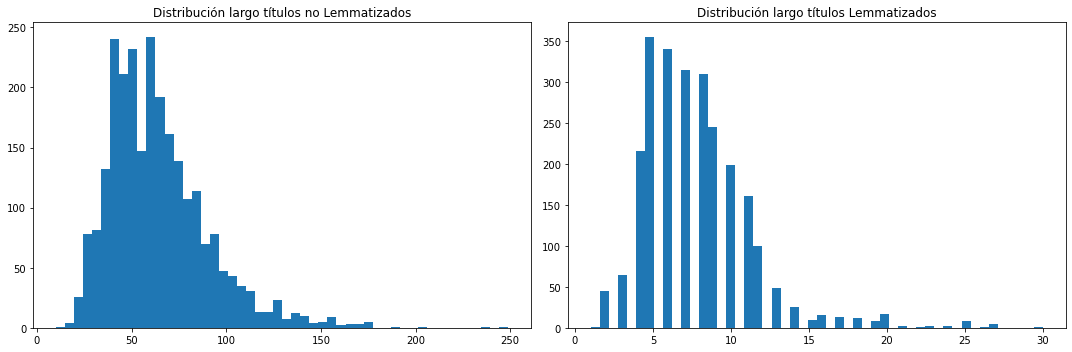

In [22]:
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True, figsize=(15,5))
n_bins = 50

axs[0].hist([len(title) for title in titles], bins=n_bins)
axs[0].set_title("Distribución largo títulos no Lemmatizados")

axs[1].hist ( [len(title_lemmatizated) for title_lemmatizated in titles_lemmatizated], bins=n_bins)
axs[1].set_title("Distribución largo títulos Lemmatizados")

plt.show()

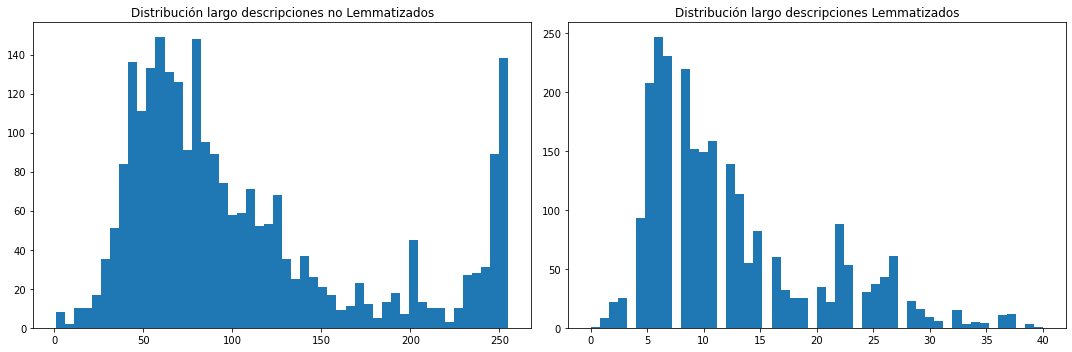

In [23]:
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True, figsize=(15,5))
n_bins = 50

axs[0].hist([len(description) for description in descriptions], bins=n_bins)
axs[0].set_title("Distribución largo descripciones no Lemmatizados")

axs[1].hist ( [len(description_lemmatizated) for description_lemmatizated in descriptions_lemmatizated], bins=n_bins)
axs[1].set_title("Distribución largo descripciones Lemmatizados")

plt.show()

> La distribución de los largos en ambos casos mantiene su forma, sin embargo, ahora son menores.

Revisemos las implicancias en el **largo del vocabulario del título** debido a la lemmatization:

In [24]:
vocabulary_titles = vectorizer(list(titles), vectorizer="CV")[0].vocabulary_
vocabulary_titles_lemmatizated = vectorizer(titles_lemmatizated_string, vectorizer="CV")[0].vocabulary_

In [25]:
print(f"No lemmatizado: {len(vocabulary_titles)}\nLemmatizatdo : {len(vocabulary_titles_lemmatizated)}")

No lemmatizado: 4274
Lemmatizatdo : 3026


In [26]:
print(f"El vocabulario de títulos disminuyó un {(len(vocabulary_titles) - len(vocabulary_titles_lemmatizated)) / len(vocabulary_titles)}%")

El vocabulario de títulos disminuyó un 0.29199812821712684%


Revisemos las implicancias en el **largo del vocabulario de las descripciones** debido a la lemmatization:

In [27]:
vocabulary_descriptions = vectorizer(list(descriptions), vectorizer="CV")[0].vocabulary_
vocabulary_descriptions_lemmatizated = vectorizer(descriptions_lemmatizated_string, vectorizer="CV")[0].vocabulary_

In [28]:
print(f"No lemmatizado: {len(vocabulary_descriptions)}\nLemmatizatdo : {len(vocabulary_descriptions_lemmatizated)}")

No lemmatizado: 5284
Lemmatizatdo : 3770


In [29]:
print(f"El vocabulario de descripciones disminuyó un {(len(vocabulary_descriptions) - len(vocabulary_descriptions_lemmatizated)) / len(vocabulary_descriptions)}%")

El vocabulario de descripciones disminuyó un 0.2865253595760787%


Finalmente, utilizamos Count Vectorizer para representar los títulos y las descripciones como vectores numéricos que posteriormente serán utilizados para el entrenamiento de modelos:

In [30]:
titles_vectorizer, titles_vectorized = vectorizer(titles_lemmatizated_string, vectorizer="CV")
descriptions_vectorizer, descriptions_vectorized = vectorizer(descriptions_lemmatizated_string, vectorizer="CV")

## Selección de modelo

La función ``train_model`` permite entrenar distintos modelos para predecir la categoría de cada publicación en función del título, la descripción y la imagen.

In [31]:
# Train a model with the vectorized data
def train_model(titles_vectorized, descriptions_vectorized, model="LR", params=None, image=True):
    
    # Import train data
    train = pd.read_csv("datasets/ferramenta_competition_train.csv")
    
    # Concatenate title, description and image features in a dataframe
    df_titles = pd.DataFrame(titles_vectorized)
    df_description = pd.DataFrame(descriptions_vectorized)
    text = pd.concat( [df_titles, df_description], axis=1, ignore_index=True)
    image_features = train.columns[4:]
    X_image, y = train[image_features], train['class']
    
    # Check whether or not take into account the image features
    if(image):
        X = pd.concat( [X_image, df_titles, df_description], axis=1, ignore_index=True)
    else:
        X = pd.concat( [df_titles, df_description], axis=1, ignore_index=True)
    
    # Create train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

    # Train a SVM model.
    if(model == "SVM"):
        classifier = svm.SVC()
        classifier.fit(X_train, y_train)
        return classifier, classifier.score(X_val, y_val)
    
    # Train a logistic regression model.
    if(model == "LR"):
        if(params):
            classifier = LogisticRegression(**params)
        else:
            classifier = LogisticRegression(max_iter=1000)
        classifier.fit(X_train,y_train)
        return classifier, classifier.score(X_val, y_val)
    
    # Train a decision tree model.
    if(model == "DT"):
        classifier = DecisionTreeClassifier()
        classifier.fit(X_train, y_train)
        return classifier, classifier.score(X_val, y_val)

    # Train a SGD model.
    if(model == "SGD"):
        classifier = SGDClassifier(penalty="l2", max_iter=1000)
        classifier.fit(X_train, y_train)
        return classifier, classifier.score(X_val, y_val)
    
    # Train a KNeighbors model.
    if(model == 'KNN'):
        classifier = KNeighborsClassifier(n_neighbors=20)
        classifier.fit(X_train, y_train)
        return classifier, classifier.score(X_val, y_val)
    
    # Train a MLP model.
    if(model == 'NN'):
        classifier = MLPClassifier(solver='adam', activation='logistic', max_iter=500, alpha=1e-4,hidden_layer_sizes=(10, 120))
        classifier.fit(X_train, y_train)
        return classifier, classifier.score(X_val, y_val)
    
    # Train a random forest model.
    if(model == 'RF'):
        classifier = RandomForestClassifier(n_estimators=1400,min_samples_split=2, min_samples_leaf=1, max_features='auto',max_depth=40, bootstrap=False)
        classifier.fit(X_train, y_train)
        return classifier, classifier.score(X_val, y_val)

Sabemos que el entrenamiento y las inferencias serán más rápidas si utilizamos los datos lemmatizados, sin embargo, aún no sabemos si esto tiene una repercusión en el accuracy de los modelos:

In [32]:
# Without Lemmatization
titles_vectorizer, titles_vectorized = vectorizer(titles, vectorizer="CV")
descriptions_vectorizer, descriptions_vectorized = vectorizer(descriptions, vectorizer="CV")

model = "LR"
start_time = time.time()
accuracy = train_model(titles_vectorized, descriptions_vectorized, model=model)[1]
print(f"{model} accuracy: {accuracy}")
print(f"Seconds: {(time.time() - start_time)}")

LR accuracy: 0.9504950495049505
Seconds: 26.138532638549805


In [33]:
# With Lemmatization
titles_vectorizer, titles_vectorized = vectorizer(titles_lemmatizated_string, vectorizer="CV")
descriptions_vectorizer, descriptions_vectorized = vectorizer(descriptions_lemmatizated_string, vectorizer="CV")

model = "LR"
start_time = time.time()
accuracy = train_model(titles_vectorized, descriptions_vectorized, model=model)[1]
print(f"{model} accuracy: {accuracy}")
print(f"Seconds: {(time.time() - start_time)}")

LR accuracy: 0.9564356435643564
Seconds: 18.6306471824646


> Observamos un pequeño aumento en el accuracy además de un menor tiempo de computación debido a un vocabulario de menor tamaño. Utilizar Lemmatization es una alternativa atractiva en contraste a la de trabajar directamente con la data cruda.

A continuación entrenaremos distintos modelos para medir someramente su capacidad de ajustar los datos considerando todos los datos y luego considerando solo el título y la descripción de los productos:

In [34]:
def test_default_models(image):
    models = ["SVM", "LR", "DT", "SGD", "KNN", "NN", "RF"]
    for model in models:
        accuracy = train_model(titles_vectorized, descriptions_vectorized, model=model, image=image)[1]
        print(f"{model} - {accuracy}")

In [35]:
test_default_models(True)

SVM - 0.9366336633663367
LR - 0.9564356435643564
DT - 0.8297029702970297
SGD - 0.9504950495049505
KNN - 0.7742574257425743
NN - 0.9465346534653465
RF - 0.9247524752475248


In [36]:
test_default_models(False)

SVM - 0.9188118811881189
LR - 0.9524752475247524
DT - 0.9148514851485149
SGD - 0.9603960396039604
KNN - 0.699009900990099
NN - 0.9425742574257425
RF - 0.9485148514851485


> Por lo general, el modelo Regresión logística se desempeña mejor.

Finalmente, ajustaremos los parámetros del modelo de regresión logística utilizando la función [Randomized Search CV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html):

In [37]:
def search_best_parameters():
    
    # Import train data
    train = pd.read_csv("datasets/ferramenta_competition_train.csv")
    
    # Concatenate title, description and image features in a dataframe
    df_titles = pd.DataFrame(titles_vectorized)
    df_description = pd.DataFrame(descriptions_vectorized)
    text = pd.concat( [df_titles, df_description], axis=1, ignore_index=True)
    image_features = train.columns[4:]
    X_image, y = train[image_features], train['class']
    
    # Without image data!
    X = pd.concat( [df_titles, df_description], axis=1, ignore_index=True)
    
    # Define search parameters
    model = LogisticRegression()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # 10, 3
    space = dict()
    space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
    space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
    space['C'] = loguniform(1e-5, 100)
    
    # Search the best parameters
    search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
    result = search.fit(X, y)
    
    print('Best Score: %s' % result.best_score_)
    print('Best Hyperparameters: %s' % result.best_params_)

Código extraido desde: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

In [38]:
# Esto toma bastante tiempo de computación
#search_best_parameters()

In [39]:
# Resultado de la búsqueda de hiperparámetros aleatorizada
params = {'max_iter': 120, 'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Finalmente, entrenamos el modelo de regresión logística con los parámetros óptimos y generamos el archivo de submission:

In [40]:
model, accuracy = train_model(titles_vectorized, descriptions_vectorized, model="LR", params=params)

In [41]:
# Execute the entire pipeline and create submission file
def submission(model, title_vectorizer, description_vectorizer):

    X_test = pd.read_csv("./datasets/ferramenta_competition_test_without_labels.csv")
    image_features = X_test.columns[3:]
    
    titles = X_test['title'].values
    descriptions = X_test['description'].values
    
    titles_lemmatizated = list(map(lambda text: lemmatization(it, text), titles))
    descriptions_lemmatizated = list(map(lambda text: lemmatization(it, text), descriptions))
    
    titles_lemmatizated_string = list(map(lambda text: ' '.join(text), titles_lemmatizated))
    descriptions_lemmatizated_string = list(map(lambda text: ' '.join(text), descriptions_lemmatizated))
    
    titles_vectorized = title_vectorizer.transform(titles_lemmatizated_string).toarray()
    descriptions_vectorized = description_vectorizer.transform(descriptions_lemmatizated_string).toarray()
    
    df_titles = pd.DataFrame(titles_vectorized)
    df_descriptions = pd.DataFrame(descriptions_vectorized)

    X = pd.concat( [X_test[image_features], df_titles, df_descriptions], axis=1, ignore_index=True)
    predictions = model.predict(X)
    df_submission = pd.concat( [pd.DataFrame(X_test['image']), pd.DataFrame(predictions)], axis=1, ignore_index=True )
    
    df_submission.rename(columns={0: 'image', 1: 'class'}, inplace=True)
    
    return df_submission

In [42]:
df_submission = submission(model, titles_vectorizer, descriptions_vectorizer)

In [43]:
#df_submission.to_csv("submission5-29-10.csv", index=False)

## Conclusiones


1. A pesar de su simplicidad, el modelo con mejor accuracy es la regresión logística.
2. Si bien el uso de lemmatization en este problema no implica una importante mejora en accuracy, sí permite un menor costo computacional a la hora de entrenar y predecir debido a que se utiliza una menor cantidad de features.
3. Los hiperparámetros del vectorizador influyen tan fuertemente en el accuracy como los del modelo.
4. Mediante la plataforma Kaggle pudimos darnos cuenta que tuvimos un mayor accuracy al realizar el entrenamiento de datos excluyendo los features asociados a las imágenes.

# Contribución por integrante

1. Fernanda Avendaño: Desarrollo del código para el test de hipótesis. Procesamiento de NLP y búsqueda de un modelo adecuado para el desafío de Kaggle. Verificación de los supuestos de normalidad en la pregunta de investigación. Generación de visualizaciones.
2. Diego Quezada: Desarrollo del código para el test de hipótesis. Procesamiento de NLP y búsqueda de un modelo adecuado para el desafío de Kaggle. Organización del notebook en general, en especial del código y su correspondiente documentación. Búsqueda de hiperparámetros para el modelo de regresión logística mediante Grid Search. 
3. Kevin Reyes: Búsqueda de datasets apropiados para el desarrollo de la pregunta de investigación además del Planteamiento de la metodología a desarrollar mediante un diagrama de flujo y el correpondiente test de hipótesis. Planteamiento de modelos base para el desafío de Kaggle.